<a href="https://colab.research.google.com/github/aritradey-CS/Admission-Prediction/blob/master/Nov_23_Update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

we manually specify the correlation matrix and then generate data that adheres to this correlation structure.This code will generate a CSV file, custom_data_correlated.csv, with data that follows the specified correlation structure. We can adjust the scale and mean values for each column to meet your specific requirements.

In [1]:
import pandas as pd
import numpy as np
import random

correlation_matrix = np.array([
    [1.0, 0.5, 0.3, 0.1, 0.2, 0.4, 0.6, 0.7],
    [0.5, 1.0, 0.6, 0.2, 0.3, 0.2, 0.8, 0.9],
    [0.3, 0.6, 1.0, 0.4, 0.7, 0.5, 0.3, 0.6],
    [0.1, 0.2, 0.4, 1.0, 0.2, 0.3, 0.1, 0.2],
    [0.2, 0.3, 0.7, 0.2, 1.0, 0.5, 0.2, 0.4],
    [0.4, 0.2, 0.5, 0.3, 0.5, 1.0, 0.3, 0.7],
    [0.6, 0.8, 0.3, 0.1, 0.2, 0.3, 1.0, 0.8],
    [0.7, 0.9, 0.6, 0.2, 0.4, 0.7, 0.8, 1.0]
])

# Generate data with the specified correlation matrix
data = np.random.multivariate_normal(mean=[0] * 8, cov=correlation_matrix, size=2000)

# Create a DataFrame
df = pd.DataFrame(data, columns=[
    'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit'
])

# Adjust the scale and mean as needed for each column
# You may need to adjust the scale and mean to match your specific requirements

# Scale and mean values
scale = [20, 10, 5, 12, 17, 1, 0.5, 0.2]
mean = [320, 100, 3, 3, 3, 3, 0.5, 0.75]

for i, col in enumerate(df.columns):
    df[col] = df[col] * scale[i] + mean[i]

# Save the DataFrame to a CSV file
df.to_csv('custom_data_correlated.csv', index=False)

print("Custom CSV file 'custom_data_correlated.csv' has been created and saved.")


Custom CSV file 'custom_data_correlated.csv' has been created and saved.


<ipython-input-1-6d50434fed8f>:17: RuntimeWarning: covariance is not positive-semidefinite.
  data = np.random.multivariate_normal(mean=[0] * 8, cov=correlation_matrix, size=2000)


It's a powerful way to create datasets for various research, testing, and modeling purposes while controlling key statistical properties.I used a different correlation matrix with arbitrary values, and can adjust the scale and mean as needed to match your specific requirements. The generated data will follow the new correlation structure and scale adjustments.

                   GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score           1.000000     0.500037           0.311244  0.085187   
TOEFL Score         0.500037     1.000000           0.569843  0.183306   
University Rating   0.311244     0.569843           1.000000  0.401747   
SOP                 0.085187     0.183306           0.401747  1.000000   
LOR                 0.202359     0.285398           0.717568  0.201932   
CGPA                0.433789     0.251630           0.524405  0.278950   
Research            0.607049     0.792083           0.301565  0.076602   
Chance of Admit     0.674229     0.793736           0.593177  0.175387   

                        LOR      CGPA  Research  Chance of Admit  
GRE Score          0.202359  0.433789  0.607049         0.674229  
TOEFL Score        0.285398  0.251630  0.792083         0.793736  
University Rating  0.717568  0.524405  0.301565         0.593177  
SOP                0.201932  0.278950  0.076602         0.175387 

<Axes: >

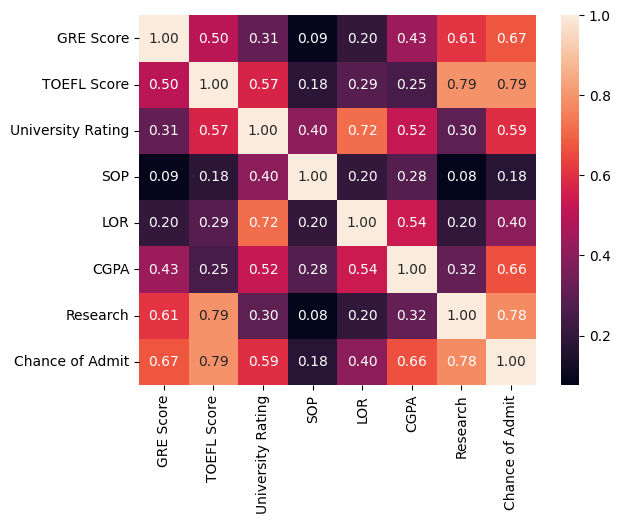

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

# Load the dataset from the CSV file
df = pd.read_csv('custom_data_correlated.csv')
df.head(10)

# Assigning the list of columns from the dataset
numericColumns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit']

# Creating a correlation matrix
correlationMatrix = df.loc[:, numericColumns].corr()

# Printing the correlation matrix
print(correlationMatrix)

# Displaying the correlation matrix with two decimal places
sns.heatmap(correlationMatrix, annot=True, fmt='.2f')  # Use fmt='.2f' to display two decimal places


1.  Loads a dataset from a CSV file named  
    'custom_data_correlated.csv' using Pandas and displays the first 10 rows of the dataset.

2.  Defines a list of numeric column names to work with.

3.  Calculates a correlation matrix for the specified 
    numeric columns. The correlation matrix shows how each numeric column is related to every other numeric column in the dataset.

4.  Prints the correlation matrix to the console, showing 
    the pairwise correlations between the columns.

5.  Displays the correlation matrix as a heatmap using 
    Seaborn. The sns.heatmap function is used to create the heatmap, and the annot=True parameter adds the correlation values to each cell of the heatmap. The fmt='.2f' parameter is used to format the values to display two decimal places in the heatmap.

In summary, this code loads a dataset, calculates and prints the correlation matrix, and then visualizes the correlation matrix as a heatmap with correlation values rounded to two decimal places. This can be helpful for understanding the relationships between the features in the dataset.


